# ΕΙΣΑΓΩΓΙΚΗ ΣΤΑΤΙΣΤΙΚΗ ΜΕ PYTHON 
# ΙΙ. Οι Περιγραφικές Πολυμεταβλητές Στατιστικές 

[0. Πολυμεταβλητά Δεδομένα](#0)
* [0.1 Εμπερικλειόμενες (Nested) Λίστες Τυχαίων Αριθμών](#0.1)
* [0.2 Πολυμεταβλητά Δεδομένα ως DataFrames](#0.2)
* [0.3 Χειρισμός Ελλειπουσών Τιμών](#0.3)

[1. Βασικές Πολυμεταβλητές Στατιστικές](#1)
* [1.1 Συνδιακύμανση](#1.1)
* [1.2 Συσχέτιση (Συντελεστής Συσχέτισης του Pearson)](#1.2)
* [1.3 Πίνακες Συμπτώσεων](#1.3)

[2. Σχεδιαγράμματα Πολυμεταβλητών Στατιστικών](#2)
* [2.1 Διαγράμματα Διασποράς](#2.1)

### Το επόμενο κελί περιέχει όλα τα μόντουλ που χρειάζονται να εισαχθούν στη συνέχεια και ΠΡΕΠΕΙ ΝΑ ΕΚΤΑΛΕΣΘΕΙ ΑΠΟ ΤΗΝ ΑΡΧΗ.

In [1]:
# import math
import random
import csv
import urllib2
# from collections import Counter
import numpy as np
import pandas as pd
# from scipy import stats, integrate
import seaborn as sns       # pip install seaborn
sns.set_style("white")      # For seaborn to show axes in iPython Notebook
import matplotlib.pyplot as plt
# from matplotlib import cm

# For printing plots in iPython Notebook cells
%matplotlib inline 

<a id='0'></a>
# 0. ΠΟΛΥΜΕΤΑΒΛΗΤΑ ΔΕΔΟΜΕΝΑ

<a id='0.1'></a>
## 0.1 Εμπερικλειόμενες (Nested) Λίστες Τυχαίων Αριθμών

#### Λίστες στηλών (εκτός από λίστα headers)

In [2]:
n = 21 # Number of number of rows (cases or items)
m = 5  # Number of columns (variables)

headers = ['names', 'height', 'weight', 'age']
names = ['John','Jane','Jack','Jenny','Andy','Anne','Bill','Pete','Mary','Sarah','Katy','Brian','David','Helen','Mike',
        'Ruth','Alex','Keith','Linda','Dawn']
height = [x/100. for x in range(159,198,2)]
random.shuffle(height)
weight = [random.randrange(500,1000,3)/10. for _ in range(20)]
age =[random.choice(range(27,67)) for _ in range(20)]

#### Μετατροπή σε λίστες γραμμών (arrays)

In [3]:
rdata = []
for i in range(20):
    rdata.append([names[i],height[i],weight[i],age[i]])

In [4]:
dfrdata = pd.DataFrame(rdata, columns=headers)
dfrdata

,names,height,weight,age
0,John,1.93,69.2,36
1,Jane,1.69,68.9,59
2,Jack,1.79,70.4,49
3,Jenny,1.83,97.1,31
4,Andy,1.61,60.5,48
5,Anne,1.85,95.3,46
6,Bill,1.97,76.4,40
7,Pete,1.77,81.2,58
8,Mary,1.81,89.0,65
9,Sarah,1.87,60.2,32


#### Πρόσβαση σε λίστες στηλών/μεταβλητών από DataFrame

In [5]:
print dfrdata['weight'], type(dfrdata['weight'])
print dfrdata['weight'].tolist(), type(dfrdata['weight'].tolist())
print list(dfrdata['weight'])
list(dfrdata['weight']) == dfrdata['weight'].tolist()

0     69.2
1     68.9
2     70.4
3     97.1
4     60.5
5     95.3
6     76.4
7     81.2
8     89.0
9     60.2
10    85.4
11    58.7
12    94.7
13    67.1
14    56.0
15    57.8
16    88.1
17    97.4
18    74.6
19    56.9
Name: weight, dtype: float64 <class 'pandas.core.series.Series'>
[69.200000000000003, 68.900000000000006, 70.400000000000006, 97.099999999999994, 60.5, 95.299999999999997, 76.400000000000006, 81.200000000000003, 89.0, 60.200000000000003, 85.400000000000006, 58.700000000000003, 94.700000000000003, 67.099999999999994, 56.0, 57.799999999999997, 88.099999999999994, 97.400000000000006, 74.599999999999994, 56.899999999999999] <type 'list'>
[69.200000000000003, 68.900000000000006, 70.400000000000006, 97.099999999999994, 60.5, 95.299999999999997, 76.400000000000006, 81.200000000000003, 89.0, 60.200000000000003, 85.400000000000006, 58.700000000000003, 94.700000000000003, 67.099999999999994, 56.0, 57.799999999999997, 88.099999999999994, 97.400000000000006, 74.599999999999994, 56.

True

#### Πρόσβαση στις (μοναδικές) τιμές μιας στήλης/μεταβλητής

In [6]:
print pd.unique(dfrdata.names.ravel()), len(pd.unique(dfrdata.names.ravel()))
print pd.unique(dfrdata.age.ravel()), len(pd.unique(dfrdata.age.ravel()))
len(dfrdata)

['John' 'Jane' 'Jack' 'Jenny' 'Andy' 'Anne' 'Bill' 'Pete' 'Mary' 'Sarah'
 'Katy' 'Brian' 'David' 'Helen' 'Mike' 'Ruth' 'Alex' 'Keith' 'Linda' 'Dawn'] 20
[36 59 49 31 48 46 40 58 65 32 66 56 63 42 51] 15


20

#### Σώσιμο DataFrame σε csv 

In [7]:
dfrdata.to_csv('data1.csv', sep='\t', index=False)  # sep = ';','\t'
# dfrdata.to_csv('data1.csv', sep='\t', encoding='utf-8')

#### Άνοιγμα/εισαγωγή csv ως DataFrame

In [8]:
dfrdata1 = pd.read_csv('data1.csv', sep='\t')
dfrdata1

,names,height,weight,age
0,John,1.93,69.2,36
1,Jane,1.69,68.9,59
2,Jack,1.79,70.4,49
3,Jenny,1.83,97.1,31
4,Andy,1.61,60.5,48
5,Anne,1.85,95.3,46
6,Bill,1.97,76.4,40
7,Pete,1.77,81.2,58
8,Mary,1.81,89.0,65
9,Sarah,1.87,60.2,32


<a id='0.2'></a>
## 0.2 Πολυμεταβλητά Δεδομένα ως DataFrames

### Κατασκευή DataFrame με Τυχαίους Αριθμούς

In [9]:
dfrdata2 = pd.DataFrame(np.random.randn(10,6))
print dfrdata2.columns
dfrdata2

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')


,0,1,2,3,4,5
0,-0.687274,-0.688954,0.023643,1.329548,0.754562,1.538301
1,0.927922,0.430057,1.251509,-1.151585,-0.483921,-0.398352
2,-0.482970,0.816691,0.085026,0.361846,-1.075159,0.461750
3,3.002760,2.118100,-0.391257,1.689389,-1.621028,-1.228962
4,1.320035,-0.163662,-0.259962,-2.627590,-0.815610,0.636340
5,-0.089729,-0.918232,0.347471,-0.732781,-0.546067,0.235971
6,0.631489,-0.117650,-0.098823,0.036735,1.619696,0.836265
7,1.736497,0.152811,1.020316,2.240549,-0.123834,0.806478
8,-0.521085,-0.145510,-1.941634,-1.342442,0.347498,0.674466
9,0.557981,-0.530942,0.017965,0.834992,-0.646819,0.760641


In [10]:
dfrdata2 = dfrdata2.rename(columns={0:'Var0',1:'Var1',2:'Var2',3:'Var3',4:'Var4',5:'Var5',})
dfrdata2

,Var0,Var1,Var2,Var3,Var4,Var5
0,-0.687274,-0.688954,0.023643,1.329548,0.754562,1.538301
1,0.927922,0.430057,1.251509,-1.151585,-0.483921,-0.398352
2,-0.482970,0.816691,0.085026,0.361846,-1.075159,0.461750
3,3.002760,2.118100,-0.391257,1.689389,-1.621028,-1.228962
4,1.320035,-0.163662,-0.259962,-2.627590,-0.815610,0.636340
5,-0.089729,-0.918232,0.347471,-0.732781,-0.546067,0.235971
6,0.631489,-0.117650,-0.098823,0.036735,1.619696,0.836265
7,1.736497,0.152811,1.020316,2.240549,-0.123834,0.806478
8,-0.521085,-0.145510,-1.941634,-1.342442,0.347498,0.674466
9,0.557981,-0.530942,0.017965,0.834992,-0.646819,0.760641


In [11]:
print dfrdata2['Var2'], type(dfrdata2['Var2'])
print dfrdata2['Var2'].tolist(), type(dfrdata2['Var2'].tolist())
print list(dfrdata2['Var2'])
list(dfrdata2['Var2']) == dfrdata2['Var2'].tolist()

0    0.023643
1    1.251509
2    0.085026
3   -0.391257
4   -0.259962
5    0.347471
6   -0.098823
7    1.020316
8   -1.941634
9    0.017965
Name: Var2, dtype: float64 <class 'pandas.core.series.Series'>
[0.02364321699828794, 1.2515088149120925, 0.085025794491350157, -0.39125704926821742, -0.25996236314950288, 0.34747097963109552, -0.098822856789552813, 1.0203163150076089, -1.9416341421199568, 0.017964653343518561] <type 'list'>
[0.02364321699828794, 1.2515088149120925, 0.085025794491350157, -0.39125704926821742, -0.25996236314950288, 0.34747097963109552, -0.098822856789552813, 1.0203163150076089, -1.9416341421199568, 0.017964653343518561]


True

In [12]:
dfrdata2_vars = []
for i in dfrdata2.columns:
    dfrdata2_vars.append(list(dfrdata2[i]))
# dfrdata2_vars

### Κατασκευή DataFrame από λεξικό

In [13]:
datadict = {'occupation': ['painter','actor','author','singer','student','manager','singer'],
            'city': ['Athens','Paris','London','Rome','Tokyo','New York','Lima'],
            'year': [1980,1998,2003,1977,1992,1977,1985],
            'reports': [5,14,22,8,31,26,17]}
ddf = pd.DataFrame(datadict, index = range(7))
ddf

,city,occupation,reports,year
0,Athens,painter,5,1980
1,Paris,actor,14,1998
2,London,author,22,2003
3,Rome,singer,8,1977
4,Tokyo,student,31,1992
5,New York,manager,26,1977
6,Lima,singer,17,1985


In [14]:
print pd.unique(ddf.city.ravel())
print pd.unique(ddf.occupation.ravel())
print pd.unique(ddf.reports.ravel())
print pd.unique(ddf.year.ravel())

['Athens' 'Paris' 'London' 'Rome' 'Tokyo' 'New York' 'Lima']
['painter' 'actor' 'author' 'singer' 'student' 'manager']
[ 5 14 22  8 31 26 17]
[1980 1998 2003 1977 1992 1985]


### Τα δεδομένα mtcars 

In [15]:
mtcars = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv")
print mtcars.shape
print mtcars.columns
mtcars

(32, 12)
Index([u'Unnamed: 0', u'mpg', u'cyl', u'disp', u'hp', u'drat', u'wt', u'qsec',
       u'vs', u'am', u'gear', u'carb'],
      dtype='object')


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [16]:
mtcars = mtcars.rename(columns={'Unnamed: 0': 'Cars'})
mtcars.columns

Index([u'Cars', u'mpg', u'cyl', u'disp', u'hp', u'drat', u'wt', u'qsec', u'vs',
       u'am', u'gear', u'carb'],
      dtype='object')

### Τα δεδομένα diamonds

In [17]:
diamonds = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv")
print diamonds.shape
print diamonds.info()

diamonds = diamonds.rename(columns={'Unnamed: 0': '#'})
print diamonds.columns

diamonds.isnull().any().any() # Check for missing values

(53940, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB
None
Index([u'#', u'carat', u'cut', u'color', u'clarity', u'depth', u'table',
       u'price', u'x', u'y', u'z'],
      dtype='object')


False

In [18]:
diamonds.head(n=5)

,#,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [19]:
diamonds.ix[range(5)]

,#,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [20]:
diamonds.ix[range(1000,1005)]

,#,carat,cut,color,clarity,depth,table,price,x,y,z
1000,1001,0.75,Ideal,D,SI1,62.3,55,2898,5.83,5.80,3.62
1001,1002,0.77,Ideal,D,SI1,62.6,57,2898,5.92,5.81,3.67
1002,1003,0.98,Good,H,SI2,57.9,56,2898,6.51,6.47,3.76
1003,1004,0.79,Ideal,G,SI1,61.1,57,2898,5.98,5.93,3.64
1004,1005,0.79,Ideal,G,SI1,62.3,57,2898,5.90,5.85,3.66


In [21]:
diamonds.ix[range(53940)[-5:]]

,#,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55,2757,5.83,5.87,3.64


In [22]:
diamonds.tail(n=5)

,#,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55,2757,5.83,5.87,3.64


In [23]:
print pd.unique(diamonds.cut.ravel())
print pd.unique(diamonds.color.ravel())
print pd.unique(diamonds.clarity.ravel())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Τα δεδομένα anscombe

In [24]:
anscombe = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv")
print anscombe.shape
print anscombe.columns
anscombe

(11, 9)
Index([u'Unnamed: 0', u'x1', u'x2', u'x3', u'x4', u'y1', u'y2', u'y3', u'y4'], dtype='object')


,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47
5,6,14,14,14,8,9.96,8.10,8.84,7.04
6,7,6,6,6,8,7.24,6.13,6.08,5.25
7,8,4,4,4,19,4.26,3.10,5.39,12.50
8,9,12,12,12,8,10.84,9.13,8.15,5.56
9,10,7,7,7,8,4.82,7.26,6.42,7.91


### Τα δεδομένα tips

In [25]:
tips = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/reshape2/tips.csv")
print tips.shape
print tips.columns
tips.head(n=4)

(244, 8)
Index([u'Unnamed: 0', u'total_bill', u'tip', u'sex', u'smoker', u'day',
       u'time', u'size'],
      dtype='object')


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,Female,No,Sun,Dinner,2
1,2,10.34,1.66,Male,No,Sun,Dinner,3
2,3,21.01,3.50,Male,No,Sun,Dinner,3
3,4,23.68,3.31,Male,No,Sun,Dinner,2


In [26]:
print pd.unique(tips.sex.ravel())
print pd.unique(tips.smoker.ravel())
print pd.unique(tips.day.ravel())
print pd.unique(tips.time.ravel())

['Female' 'Male']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


<a id='0.3'></a>
## 0.3 Χειρισμός Ελλειπουσών Τιμών

### Κατασκευή DataFrame με Τυχαίους Αριθμούς και Ελλείπουσες Τιμές

In [27]:
df = pd.DataFrame(np.random.randn(10,4))
df.iloc[1:4,0] = np.nan
df.iloc[5,2] = np.nan
df.iloc[7:9,3] = np.nan
print df.shape
df

(10, 4)


,0,1,2,3
0,0.168338,0.189235,-1.488806,-0.351599
1,NaN,-1.133217,2.370291,-0.255601
2,NaN,-1.566279,1.519880,0.334499
3,NaN,0.210022,0.258532,-0.555532
4,0.739218,-2.241915,-0.411308,-1.407072
5,-0.382930,-0.031504,NaN,0.473585
6,-0.506699,-0.370319,0.838726,0.879413
7,-0.956407,-1.012479,-0.512324,NaN
8,0.104580,0.384332,-0.965286,NaN
9,-1.009496,-0.002219,-0.585837,0.964229


In [28]:
print df.isnull().any().any()
print df.isnull().any()
print df.isnull().sum().sum()
df.isnull().sum()

True
0     True
1    False
2     True
3     True
dtype: bool
6


0    3
1    0
2    1
3    2
dtype: int64

In [29]:
df = df.dropna()
print df.isnull().any().any()
df.isnull().sum().sum()
print df.shape
df

False
(4, 4)


,0,1,2,3
0,0.168338,0.189235,-1.488806,-0.351599
4,0.739218,-2.241915,-0.411308,-1.407072
6,-0.506699,-0.370319,0.838726,0.879413
9,-1.009496,-0.002219,-0.585837,0.964229


### Τα δεδομένα airquality

In [30]:
airquality = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/airquality.csv")
print airquality.shape
print airquality.columns
# airquality

(153, 7)
Index([u'Unnamed: 0', u'Ozone', u'Solar.R', u'Wind', u'Temp', u'Month',
       u'Day'],
      dtype='object')


In [31]:
print airquality.isnull().any().any()
print airquality.isnull().any()
print airquality.isnull().sum().sum()
airquality.isnull().sum()

True
Unnamed: 0    False
Ozone          True
Solar.R        True
Wind          False
Temp          False
Month         False
Day           False
dtype: bool
44


Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
dtype: int64

In [32]:
airquality = airquality.dropna()
print airquality.isnull().any().any()
print airquality.isnull().sum().sum()
print airquality.shape
print airquality.columns
airquality.head(n=4)

False
0
(111, 7)
Index([u'Unnamed: 0', u'Ozone', u'Solar.R', u'Wind', u'Temp', u'Month',
       u'Day'],
      dtype='object')


,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41,190,7.4,67,5,1
1,2,36,118,8.0,72,5,2
2,3,12,149,12.6,74,5,3
3,4,18,313,11.5,62,5,4


### Τα δεδομένα brain_size

In [33]:
brainsize = pd.read_csv("brain_size.csv",sep=';')
print brainsize.shape
print brainsize.isnull().any().any()
print brainsize.isnull().any()
print brainsize.isnull().sum().sum()
brainsize.isnull().sum()

(40, 8)
False
Unnamed: 0    False
Gender        False
FSIQ          False
VIQ           False
PIQ           False
Weight        False
Height        False
MRI_Count     False
dtype: bool
0


Unnamed: 0    0
Gender        0
FSIQ          0
VIQ           0
PIQ           0
Weight        0
Height        0
MRI_Count     0
dtype: int64

In [34]:
brainsize

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545
5,6,Female,99,90,110,146,69.0,928799
6,7,Female,138,136,131,138,64.5,991305
7,8,Female,92,90,98,175,66.0,854258
8,9,Male,89,93,84,134,66.3,904858
9,10,Male,133,114,147,172,68.8,955466


In [35]:
df = brainsize
df['Weight'].replace('.', np.nan, inplace=True)
df['Height'].replace('.', np.nan, inplace=True)
brainsize = df.dropna()
print brainsize.isnull().any().any()
print brainsize.isnull().sum().sum()
print brainsize.shape
brainsize

False
0
(38, 8)


,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545
5,6,Female,99,90,110,146,69.0,928799
6,7,Female,138,136,131,138,64.5,991305
7,8,Female,92,90,98,175,66.0,854258
8,9,Male,89,93,84,134,66.3,904858
9,10,Male,133,114,147,172,68.8,955466
10,11,Female,132,129,124,118,64.5,833868


<a id='1'></a>
# 1. ΒΑΣΙΚΕΣ ΠΟΛΥΜΕΤΑΒΛΗΤΕΣ ΣΤΑΤΙΣΤΙΚΕΣ

<a id='1.1'></a>
## 1.1 Συνδιακύμανση

Η **συνδιακύμανση** δυο μεταβλητών $x = (x_1, x_2, \ldots, x_n)$ και $y = (y_1, y_2, \ldots, y_n)$ με μέσες τιμές $\bar{x}$ και $\bar{y}$, αντιστοίχως, ορίζεται ως 

\begin{equation}
\frac{1}{n} \sum_{i = 1}^n (x_i - \bar{x}) (y_i - \bar{y})
\end{equation}

Η **δειγματική συνδιακύμανση** των μεταβλητών αυτών ορίζεται ως 

\begin{equation}
\frac{1}{n - 1} \sum_{i = 1}^n (x_i - \bar{x}) (y_i - \bar{y})
\end{equation}

In [36]:
def covariance(x,y):
    return sum([(xi - np.mean(x))*(yi - np.mean(y)) for (xi, yi) in zip(x,y)])/float(len(x))
def scovariance(x,y):
    return sum([(xi - np.mean(x))*(yi - np.mean(y)) for (xi, yi) in zip(x,y)])/float(len(x)-1)

In [37]:
x = dfrdata2_vars[1]
y = dfrdata2_vars[3]
print covariance(x,y), scovariance(x,y)
print np.cov(x,y)[1,0]
print np.cov(x,y)
dfrdata2.cov()

0.359468372708 0.399409303008
0.399409303008
[[ 0.77026364  0.3994093 ]
 [ 0.3994093   2.33333298]]


,Var0,Var1,Var2,Var3,Var4,Var5
Var0,1.360047,0.673992,0.250139,0.464871,-0.491206,-0.587178
Var1,0.673992,0.770264,-0.008722,0.399409,-0.452717,-0.518545
Var2,0.250139,-0.008722,0.748472,0.365440,-0.109041,-0.067182
Var3,0.464871,0.399409,0.365440,2.333333,-0.009215,0.004577
Var4,-0.491206,-0.452717,-0.109041,-0.009215,0.895263,0.479812
Var5,-0.587178,-0.518545,-0.067182,0.004577,0.479812,0.580411


In [38]:
print mtcars[['hp','wt']].cov()
print 'cov(hp,wt) =', mtcars[['hp','wt']].cov().hp[1]
mtcars.cov()

             hp         wt
hp  4700.866935  44.192661
wt    44.192661   0.957379
cov(hp,wt) = 44.1926612903


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,36.324103,-9.172379,-633.097208,-320.732056,2.195064,-5.116685,4.509149,2.017137,1.803931,2.135685,-5.363105
cyl,-9.172379,3.189516,199.660282,101.931452,-0.668367,1.367371,-1.886855,-0.729839,-0.465726,-0.649194,1.520161
disp,-633.097208,199.660282,15360.799829,6721.158669,-47.064019,107.684204,-96.051681,-44.377621,-36.564012,-50.802621,79.068750
hp,-320.732056,101.931452,6721.158669,4700.866935,-16.451109,44.192661,-86.770081,-24.987903,-8.320565,-6.358871,83.036290
drat,2.195064,-0.668367,-47.064019,-16.451109,0.285881,-0.372721,0.087141,0.118649,0.190151,0.275988,-0.078407
wt,-5.116685,1.367371,107.684204,44.192661,-0.372721,0.957379,-0.305482,-0.273661,-0.338105,-0.421081,0.675790
qsec,4.509149,-1.886855,-96.051681,-86.770081,0.087141,-0.305482,3.193166,0.670565,-0.204960,-0.280403,-1.894113
vs,2.017137,-0.729839,-44.377621,-24.987903,0.118649,-0.273661,0.670565,0.254032,0.042339,0.076613,-0.463710
am,1.803931,-0.465726,-36.564012,-8.320565,0.190151,-0.338105,-0.204960,0.042339,0.248992,0.292339,0.046371
gear,2.135685,-0.649194,-50.802621,-6.358871,0.275988,-0.421081,-0.280403,0.076613,0.292339,0.544355,0.326613


In [39]:
print diamonds[['table','y']].cov()
print 'cov(y,table) =', diamonds[['table','y']].cov().y[0]
diamonds.cov()

          table         y
table  4.992948  0.468972
y      0.468972  1.304472
cov(y,table) = 0.468972277805


,#,carat,depth,table,price,x,y,z
#,2.424648e+08,-2789.881850,-776.314805,-3508.278095,-19063172.878038,-7081.930753,-7039.864013,-4386.754198
carat,-2.789882e+03,0.224687,0.019167,0.192365,1742.765364,0.518484,0.515248,0.318917
depth,-7.763148e+02,0.019167,2.052404,-0.946840,-60.853712,-0.040641,-0.048009,0.095968
table,-3.508278e+03,0.192365,-0.946840,4.992948,1133.318064,0.489643,0.468972,0.237996
price,-1.906317e+07,1742.765364,-60.853712,1133.318064,15915629.424301,3958.021491,3943.270810,2424.712613
x,-7.081931e+03,0.518484,-0.040641,0.489643,3958.021491,1.258347,1.248789,0.768487
y,-7.039864e+03,0.515248,-0.048009,0.468972,3943.270810,1.248789,1.304472,0.767320
z,-4.386754e+03,0.318917,0.095968,0.237996,2424.712613,0.768487,0.767320,0.498011


<a id='1.2'></a>
## 1.2 Συσχέτιση (Συντελεστής Συσχέτισης του Pearson)

Η **συσχέτιση** (**δειγματική συσχέτιση**) δυο μεταβλητών ορίζεται ως η (δειγματική) συνδιακύμανσή τους διαιρούμενη με το γινόμενο των (δειγματικών) τυπικών αποκλίσεών τους.

In [40]:
print dfrdata2[['Var1','Var4']].corr()
print 'corr(Var1,Var4) =', dfrdata2[['Var1','Var4']].corr().Var1[1]
dfrdata2.corr()


          Var1      Var4
Var1  1.000000 -0.545169
Var4 -0.545169  1.000000
corr(Var1,Var4) = -0.545169220393


,Var0,Var1,Var2,Var3,Var4,Var5
Var0,1.000000,0.658504,0.247923,0.260956,-0.445155,-0.660883
Var1,0.658504,1.000000,-0.011488,0.297927,-0.545169,-0.775530
Var2,0.247923,-0.011488,1.000000,0.276528,-0.133208,-0.101929
Var3,0.260956,0.297927,0.276528,1.000000,-0.006376,0.003933
Var4,-0.445155,-0.545169,-0.133208,-0.006376,1.000000,0.665622
Var5,-0.660883,-0.775530,-0.101929,0.003933,0.665622,1.000000


In [41]:
print mtcars[['hp','wt']].corr()
print 'corr(hp,wt) =', mtcars[['hp','wt']].corr().wt[0]
mtcars.corr()

          hp        wt
hp  1.000000  0.658748
wt  0.658748  1.000000
corr(hp,wt) = 0.658747887345


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [42]:
print diamonds[['table','y']].corr()
print 'corr(table,y) =', diamonds[['table','y']].corr().table[1]
diamonds.corr()

         table        y
table  1.00000  0.18376
y      0.18376  1.00000
corr(table,y) = 0.183760147116


,#,carat,depth,table,price,x,y,z
#,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<a id='1.3'></a>
## 1.3 Πίνακες Συμπτώσεων

In [52]:
print pd.unique(tips.day.ravel())
print pd.unique(tips.time.ravel())

tips_day_time_ct = pd.crosstab(index=tips["day"], columns=tips["time"])
tips_day_time_ct

['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


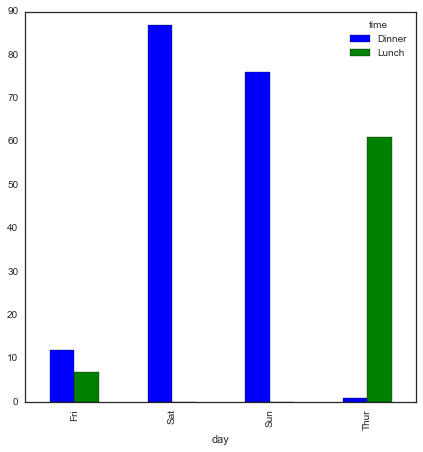

In [54]:
tips_day_time_ct.plot(kind="bar", figsize=(7,7), stacked=False)

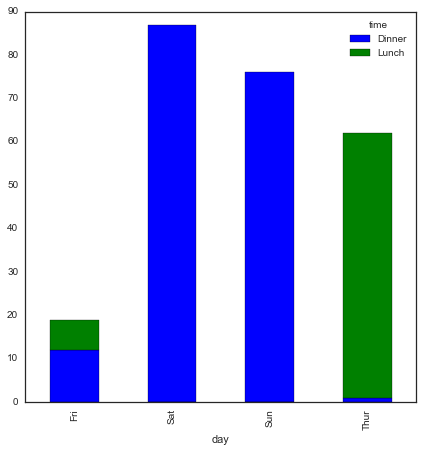

In [55]:
tips_day_time_ct.plot(kind="bar", figsize=(7,7), stacked=True)

In [57]:
print pd.unique(mtcars.cyl.ravel())
print pd.unique(mtcars.gear.ravel())

mtcars_cyl_gear_ct = pd.crosstab(index=mtcars["cyl"], columns=mtcars["gear"])
mtcars_cyl_gear_ct 

[6 4 8]
[4 3 5]


gear,3,4,5
cyl,,,
4,1,8,2
6,2,4,1
8,12,0,2


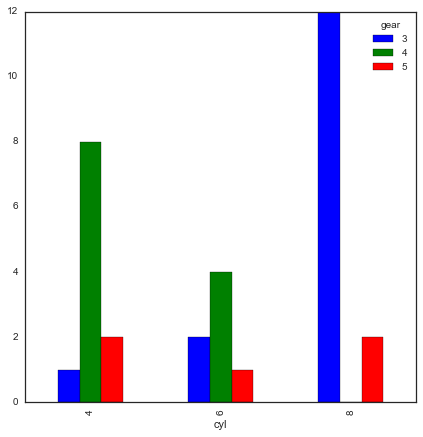

In [58]:
mtcars_cyl_gear_ct.plot(kind="bar", figsize=(7,7), stacked=False)

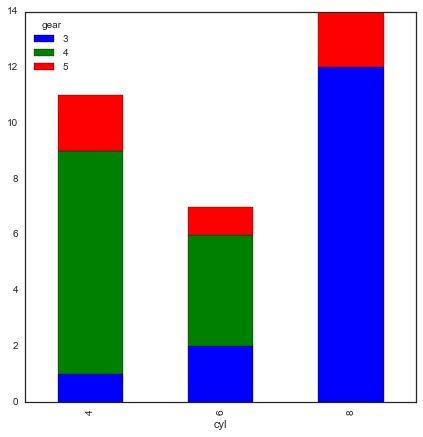

In [59]:
mtcars_cyl_gear_ct.plot(kind="bar", figsize=(7,7), stacked=True)

In [46]:
print pd.unique(diamonds.clarity.ravel())
print pd.unique(diamonds.color.ravel())

diamonds_clarity_color_ct = pd.crosstab(index=diamonds["clarity"], columns=diamonds["color"])
diamonds_clarity_color_ct 

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


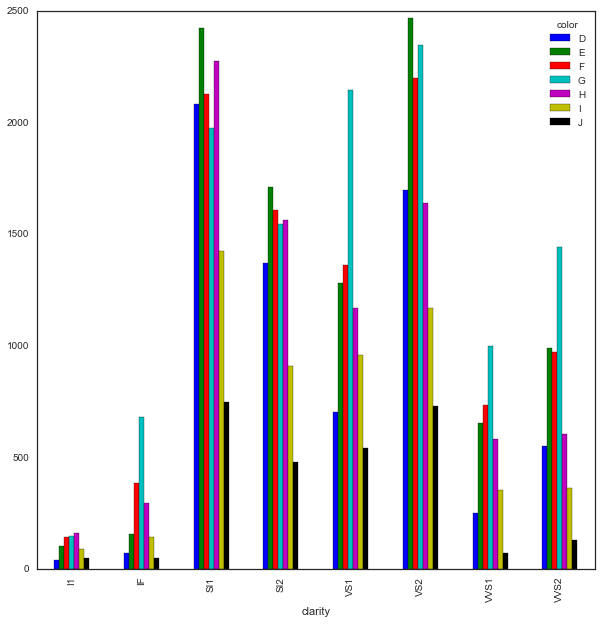

In [49]:
diamonds_clarity_color_ct.plot(kind="bar", figsize=(10,10), stacked=False)

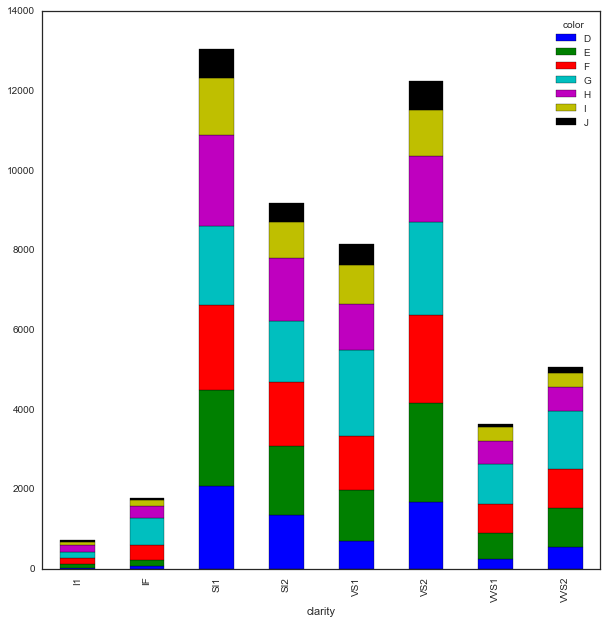

In [48]:
diamonds_clarity_color_ct.plot(kind="bar", figsize=(10,10), stacked=True)

<a id='2'></a>
# 2. ΣΧΕΔΙΑΓΡΑΜΜΑΤΑ ΠΟΛΥΜΕΤΑΒΛΗΤΩΝ ΣΤΑΤΙΣΤΙΚΩΝ

<a id='2.1'></a>
## 2.1 Διαγράμματα Διασποράς